In [1]:
# Import initial necessary libraries
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
from openai import OpenAI
from dotenv import load_dotenv
import io
import base64

In [3]:
# Load dataset
df = pd.read_csv('Clicked Ads Dataset.csv', index_col=0)
df.sample(10)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Timestamp,Clicked on Ad,city,province,category
806,55.32,43,473776240.0,127.65,Perempuan,3/18/2016 9:08,Yes,Palembang,Sumatra Selatan,Otomotif
182,62.95,60,257265680.0,157.04,Perempuan,5/24/2016 13:30,Yes,Jakarta Pusat,Daerah Khusus Ibukota Jakarta,Otomotif
119,88.97,45,344889860.0,152.49,Perempuan,6/11/2016 18:32,Yes,Bandung,Jawa Barat,Food
477,44.96,50,369614000.0,132.71,Laki-Laki,1/2/2016 12:25,Yes,Jakarta Utara,Daerah Khusus Ibukota Jakarta,Otomotif
291,84.71,32,431270350.0,210.23,Perempuan,5/29/2016 7:29,No,Jakarta Pusat,Daerah Khusus Ibukota Jakarta,Food
371,36.08,45,289920890.0,151.47,Laki-Laki,7/3/2016 4:11,Yes,Jakarta Timur,Daerah Khusus Ibukota Jakarta,Otomotif
61,85.84,34,452582620.0,192.93,Laki-Laki,6/15/2016 5:30,No,Denpasar,Bali,Health
301,52.62,50,517042750.0,176.52,Perempuan,2/1/2016 20:30,Yes,Denpasar,Bali,Finance
363,73.30,36,477479450.0,135.72,Laki-Laki,1/30/2016 4:38,Yes,Batam,Kepulauan Riau,Bank
458,64.88,42,490038570.0,129.80,Laki-Laki,2/14/2016 22:23,Yes,Jakarta Selatan,Daerah Khusus Ibukota Jakarta,Bank


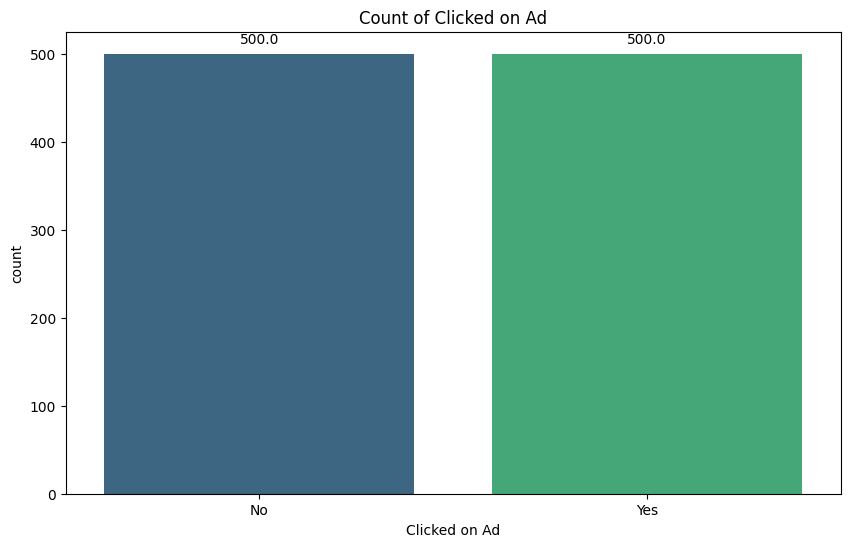

In [6]:
# Check what the plot looks like
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Clicked on Ad', palette='viridis')
plt.title('Count of Clicked on Ad')

# Add annotations on top of each bar
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height()}', 
                      (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha='center', va='center', 
                      xytext=(0, 10), 
                      textcoords='offset points')

# Show the plot
plt.show()

In [ ]:
## Create a simple countplot and analyze it using GPT-4 Vision

# Load environment variables
load_dotenv()

# Initialize the OpenAI client
client = OpenAI(api_key=os.environ.get("OPENAI_KEY"))

# Create the plot
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Clicked on Ad', palette='viridis')
plt.title('Count of Clicked on Ad')

# Add annotations on top of each bar
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height()}', # Add the count on top of the bar
                      (p.get_x() + p.get_width() / 2., p.get_height()), # Center the text
                      ha='center', va='center', 
                      xytext=(0, 10), # Offset the text by 10 points
                      textcoords='offset points') # Offset the text from the bar

# Save the plot to a bytes buffer
buffer = io.BytesIO()
plt.savefig(buffer, format='png')
buffer.seek(0)

# Convert the image to base64
image_base64 = base64.b64encode(buffer.getvalue()).decode('utf-8')

# Create the message for GPT-4 Vision
response = client.chat.completions.create(
    model="gpt-4-turbo",  # Make sure to use the model that can handle vision
    messages=[
        {
            "role": "user",
            "content": [
                {
                    "type": "text",
                    "text": "Please analyze this chart and explain what it shows. Include the specific numbers and any interesting patterns or insights you observe."
                },
                {
                    "type": "image_url",
                    "image_url": {
                        "url": f"data:image/png;base64,{image_base64}",
                        "detail": "high"
                    }
                }
            ]
        }
    ],
    max_tokens=500
)

# Print the analysis
print(response.choices[0].message.content)

# Close the plot to free memory
plt.close()

The chart shown is a bar chart titled "Count of Clicked on Ad" that compares the number of times people clicked on an advertisement versus those who did not click on the advertisement. Each bar represents the count of responses, categorized into "Yes" for users who clicked on the ad and "No" for users who did not click on the ad.

Both bars are at 500.0, which indicates:

1. **Equal Response Distribution**: There is an equal number of people who clicked on the ad and who did not click on it. Each category has a count of 500, which shows a perfectly balanced distribution between the two actions.

2. **Insight and Implications**: This balance might imply that the advertisement is effectively capturing attention, as exactly half of the observed sample has engaged with it by clicking. For ad campaigns, achieving a 50% click rate is exceptionally high, suggesting the ad could be very compelling or well-targeted.

3. **Considerations for Further Analysis**: While the graph gives a clear nume

### Code Explanation

To have GPT analyze a chart, you'll need to first convert it to a base64 encoded image and then use the vision capabilities of GPT-4 Vision. Here's how you can modify your code to do this:


```python
import seaborn as sns
import matplotlib.pyplot as plt
import os
from openai import OpenAI
from dotenv import load_dotenv
import io
import base64

# Load environment variables
load_dotenv()

# Initialize the OpenAI client
client = OpenAI(api_key=os.environ.get("OPENAI_KEY"))

# Create the plot
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Clicked on Ad', palette='viridis')
plt.title('Count of Clicked on Ad')

# Add annotations on top of each bar
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height()}', 
                      (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha='center', va='center', 
                      xytext=(0, 10), 
                      textcoords='offset points')

# Save the plot to a bytes buffer
buffer = io.BytesIO()
plt.savefig(buffer, format='png')
buffer.seek(0)

# Convert the image to base64
image_base64 = base64.b64encode(buffer.getvalue()).decode('utf-8')

# Create the message for GPT-4 Vision
response = client.chat.completions.create(
    model="gpt-4-vision-preview",  # Make sure to use the vision model
    messages=[
        {
            "role": "user",
            "content": [
                {
                    "type": "text",
                    "text": "Please analyze this chart and explain what it shows. Include the specific numbers and any interesting patterns or insights you observe."
                },
                {
                    "type": "image_url",
                    "image_url": {
                        "url": f"data:image/png;base64,{image_base64}",
                        "detail": "high"
                    }
                }
            ]
        }
    ],
    max_tokens=500
)

# Print the analysis
print(response.choices[0].message.content)

# Close the plot to free memory
plt.close()

```

Key points about this implementation:

1. We use `io.BytesIO()` to save the plot to a memory buffer instead of a file
2. The plot is converted to base64 encoding, which is required for sending images to the API
3. We use the `gpt-4-vision-preview` model instead of the regular chat models
4. The message format includes both text and image content
5. The image is sent as a data URL with the base64-encoded image data

A few important notes:
- You need access to GPT-4 Vision to use this functionality
- The vision model may have higher costs than regular chat completions
- Make sure your OpenAI account has sufficient credits/billing set up
- The model can see and analyze all elements of the plot including titles, labels, and annotations

Would you like to see an example of how to modify this code to analyze different types of charts or to ask more specific analytical questions about the visualization?